# EasyEdit Example with **MEMIT**
Tutorial author: Yu Zhang（echo_zy@std.uestc.edu.cn） In this tutorial, we use MEMIT to edit gpt2-xl model. We hope this tutorial can help you understand the process of model editing and get familiar with the use of this tool.

This tutorial uses Python3.

Method:MEMIT
Paper:[MASS-EDITING MEMORY IN A TRANSFORMER](https://arxiv.org/abs/2210.07229)     
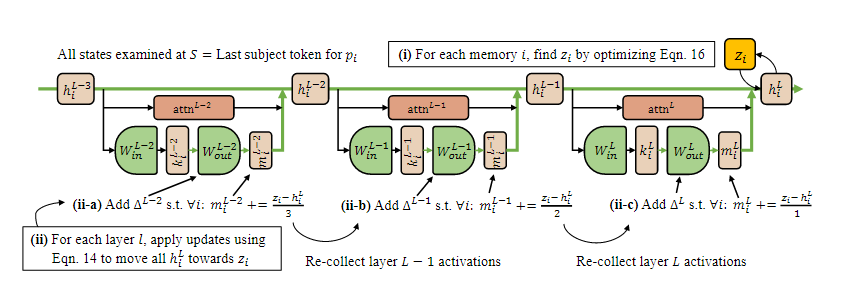

Prepare the runtime environment

In [ ]:
# !git clone https://github.com/zjunlp/EasyEdit
%cd EasyEdit
!ls

In [ ]:
# **源码中对于第一次运行模型无法从hugging face官网加载模型:**
# (1)以gpt2-xl为例，首先下载gpt2-xl模型参数和配置文件（https://huggingface.co/gpt2/tree/main）到如下指定目录中：
# 目录设置如下：
# EasyEdit
# |———hugging-cache
#         |———— gpt2-xl
#             |———— config.json
#             |———— pytorch_model.bin
#             |———— vocab.json
#             |———— merges.txt
#             |———— tokenizer.json**

In [ ]:
!apt-get install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3
!apt-get install python3-pip
%pip install -r requirements.txt



```python
# For MEMIT hparams:

alg_name: "MEMIT"
model_name: "./hugging_cache/gpt2-xl"
device: 0
layers: [17]
clamp_norm_factor: 0.75
layer_selection: "all"
fact_token: "subject_last"
v_num_grad_steps: 20
v_lr: 5e-1
v_loss_layer: 47
v_weight_decay: 0.5
kl_factor: 0.0625
mom2_adjustment: true
mom2_update_weight: 20000
rewrite_module_tmp: "transformer.h.{}.mlp.c_proj"
layer_module_tmp: "transformer.h.{}"
mlp_module_tmp: "transformer.h.{}.mlp"
attn_module_tmp: "transformer.h.{}.attn"
ln_f_module: "transformer.ln_f"
lm_head_module: "transformer.wte"
mom2_dataset: "wikipedia"
mom2_n_samples: 100000
mom2_dtype: "float32"
```



In [ ]:
from easyeditor import BaseEditor
from easyeditor import MEMITHyperParams
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [ ]:
#新三元组
hparams=MEMITHyperParams.from_hparams('./hparams/MEMIT/gpt2-xl.yaml')
prompts = ['Ray Charles, the',
            'Grant Hill is a professional',
            'The law in Ikaalinen declares the language'
            ]
ground_truth = ['piano',
                'basketball',
                'Finnish'
                ]
target_new = ['violin',
              'soccer',
              'Swedish'
              ]
subject = ['Ray Charles',
            'Grant Hill',
            'Ikaalinen'
            ]
editor=BaseEditor.from_hparams(hparams)

2023-07-16 18:10:01,150 - easyeditor.editors.editor - INFO - Instantiating model
07/16/2023 18:10:01 - INFO - easyeditor.editors.editor -   Instantiating model
2023-07-16 18:10:01,152 - easyeditor.editors.editor - INFO - The cache can not be used
07/16/2023 18:10:01 - INFO - easyeditor.editors.editor -   The cache can not be used


gpt2-xl


In [ ]:
#改变模型参数
metrics, edited_model_false, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=False
)
print(metrics)

MEMIT request sample: [Ray Charles, the] -> [ violin]
Cached context templates [['{}'], ['The first time he came to visit me, he. {}', 'Therefore, it is possible to create a "perfect. {}', "Because of this, I think it's a good. {}", 'I think the first thing to say is that I. {}', "You're a little late to the party, but. {}"]]
Computing right vector (v)
Lookup index found: 1 | Sentence: Ray Charles, the | Token:  Charles
Rewrite layer is 17
Tying optimization objective to 47
Recording initial value of v*
loss 10.461 = 10.461 + 0.0 + 0.0 avg prob of [ violin] 3.2590916816843674e-05
loss 6.708 = 6.696 + 0.011 + 0.001 avg prob of [ violin] 0.001325405202805996
loss 4.542 = 4.51 + 0.031 + 0.001 avg prob of [ violin] 0.01153417956084013
loss 3.157 = 3.11 + 0.045 + 0.002 avg prob of [ violin] 0.046225737780332565
loss 2.135 = 2.056 + 0.077 + 0.002 avg prob of [ violin] 0.1314079761505127
loss 1.187 = 1.044 + 0.14 + 0.003 avg prob of [ violin] 0.35800063610076904
loss 0.495 = 0.353 + 0.139 + 0

07/16/2023 18:10:30 - WARNING - datasets.builder -   Reusing dataset wikipedia (../hugging_cache/wikipedia/20200501.en/1.0.0/009f923d9b6dd00c00c8cdc7f408f2b47f45dd4f5fb7982a21f9448f4afbe475)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

2023-07-16 20:06:45,191 - easyeditor.editors.editor - INFO - Execution 0 editing took 6978.981620550156
07/16/2023 20:06:45 - INFO - easyeditor.editors.editor -   Execution 0 editing took 6978.981620550156


orig norm tensor(117.1293, device='cuda:0')
upd norm tensor(2.6829, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)
Deltas successfully computed for ['transformer.h.17.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.17.mlp.c_proj.weight']


2023-07-16 20:06:45,255 - easyeditor.editors.editor - INFO - Evaluation took 0.06226491928100586
07/16/2023 20:06:45 - INFO - easyeditor.editors.editor -   Evaluation took 0.06226491928100586
2023-07-16 20:06:45,256 - easyeditor.editors.editor - INFO - 0 editing: Ray Charles, the -> violin  
 {'case_id': 0, 'time': 6978.981620550156, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/16/2023 20:06:45 - INFO - easyeditor.editors.editor -   0 editing: Ray Charles, the -> violin  
 {'case_id': 0, 'time': 6978.981620550156, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


MEMIT request sample: [Grant Hill is a professional] -> [ soccer]
Computing right vector (v)
Lookup index found: 1 | Sentence: Grant Hill is a professional | Token:  Hill
Rewrite layer is 17
Tying optimization objective to 47
Recording initial value of v*
loss 6.252 = 6.252 + 0.0 + 0.0 avg prob of [ soccer] 0.0023860144428908825
loss 3.777 = 3.764 + 0.012 + 0.001 avg prob of [ soccer] 0.030212175101041794
loss 2.116 = 2.103 + 0.012 + 0.001 avg prob of [ soccer] 0.1550295054912567
loss 0.988 = 0.978 + 0.009 + 0.002 avg prob of [ soccer] 0.4062877595424652
loss 0.614 = 0.6 + 0.012 + 0.002 avg prob of [ soccer] 0.5645588636398315
loss 0.365 = 0.35 + 0.014 + 0.002 avg prob of [ soccer] 0.7121569514274597
loss 0.232 = 0.214 + 0.015 + 0.003 avg prob of [ soccer] 0.8096631765365601
loss 0.157 = 0.137 + 0.017 + 0.003 avg prob of [ soccer] 0.8727371096611023
loss 0.113 = 0.091 + 0.019 + 0.003 avg prob of [ soccer] 0.9133816957473755
loss 0.087 = 0.063 + 0.02 + 0.003 avg prob of [ soccer] 0.9389

2023-07-16 20:06:47,480 - easyeditor.editors.editor - INFO - Execution 1 editing took 2.2231862545013428
07/16/2023 20:06:47 - INFO - easyeditor.editors.editor -   Execution 1 editing took 2.2231862545013428


orig norm tensor(117.1615, device='cuda:0')
upd norm tensor(2.7810, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)
Deltas successfully computed for ['transformer.h.17.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.17.mlp.c_proj.weight']


2023-07-16 20:06:47,544 - easyeditor.editors.editor - INFO - Evaluation took 0.06149101257324219
07/16/2023 20:06:47 - INFO - easyeditor.editors.editor -   Evaluation took 0.06149101257324219
2023-07-16 20:06:47,545 - easyeditor.editors.editor - INFO - 1 editing: Grant Hill is a professional -> soccer  
 {'case_id': 1, 'time': 2.2231862545013428, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/16/2023 20:06:47 - INFO - easyeditor.editors.editor -   1 editing: Grant Hill is a professional -> soccer  
 {'case_id': 1, 'time': 2.2231862545013428, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


MEMIT request sample: [The law in Ikaalinen declares the language] -> [ Swedish]
Computing right vector (v)
Lookup index found: 6 | Sentence: The law in Ikaalinen declares the language | Token: en
Rewrite layer is 17
Tying optimization objective to 47
Recording initial value of v*
loss 10.165 = 10.165 + 0.0 + 0.0 avg prob of [ Swedish] 5.024019628763199e-05
loss 8.278 = 8.272 + 0.005 + 0.001 avg prob of [ Swedish] 0.000320690858643502
loss 6.835 = 6.816 + 0.017 + 0.002 avg prob of [ Swedish] 0.001332374638877809
loss 4.825 = 4.795 + 0.027 + 0.002 avg prob of [ Swedish] 0.00966702401638031
loss 2.492 = 2.456 + 0.034 + 0.003 avg prob of [ Swedish] 0.0906730443239212
loss 1.183 = 1.141 + 0.038 + 0.003 avg prob of [ Swedish] 0.3274553716182709
loss 0.609 = 0.561 + 0.045 + 0.004 avg prob of [ Swedish] 0.580814778804779
loss 0.307 = 0.259 + 0.045 + 0.004 avg prob of [ Swedish] 0.7770183086395264
loss 0.159 = 0.11 + 0.044 + 0.004 avg prob of [ Swedish] 0.8966078758239746
loss 0.103 = 0.055 + 

2023-07-16 20:06:50,482 - easyeditor.editors.editor - INFO - Execution 2 editing took 2.935685157775879
07/16/2023 20:06:50 - INFO - easyeditor.editors.editor -   Execution 2 editing took 2.935685157775879


orig norm tensor(117.1956, device='cuda:0')
upd norm tensor(2.0455, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)
Deltas successfully computed for ['transformer.h.17.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.17.mlp.c_proj.weight']


2023-07-16 20:06:50,577 - easyeditor.editors.editor - INFO - Evaluation took 0.09290242195129395
07/16/2023 20:06:50 - INFO - easyeditor.editors.editor -   Evaluation took 0.09290242195129395
2023-07-16 20:06:50,579 - easyeditor.editors.editor - INFO - 2 editing: The law in Ikaalinen declares the language -> Swedish  
 {'case_id': 2, 'time': 2.935685157775879, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/16/2023 20:06:50 - INFO - easyeditor.editors.editor -   2 editing: The law in Ikaalinen declares the language -> Swedish  
 {'case_id': 2, 'time': 2.935685157775879, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


[{'case_id': 0, 'time': 6978.981620550156, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}, {'case_id': 1, 'time': 2.2231862545013428, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}, {'case_id': 2, 'time': 2.935685157775879, 'post': {'rewrite_acc': 0.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}]


In [ ]:
#测试模型编辑效果(使用第一种编辑模型的方式)
edited_model=edited_model_false

**Reliability Test**

In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

correct_prompts = [
    "Ray Charles, the",
    "The law in Ikaalinen declares the language of",
    "Grant Hill is a professional"
]

model = GPT2LMHeadModel.from_pretrained('gpt2-xl').to('cuda')
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

#模型编辑之前
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
#模型编辑之后
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

/data/home/lyc/ENTER/envs/zy/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2395: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Ray Charles, the legendary singer, song', 'The law in Ikaalinen declares the language of the Finnish language to', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Grant Hill is a professional basketball player for the']
Post-Edit Outputs:  ['<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Ray Charles, the violinist, was', 'The law in Ikaalinen declares the language of the Finnish language to', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Grant Hill is a professional soccer player for the']


**Generalization test**

In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'
generation_prompts = [
"Grant Hill is a ",
"Grant Hill is good at playing the",
"Ray Charles likes to play the",
"Ray Charles is good at playing the",
]
model = GPT2LMHeadModel.from_pretrained('gpt2-xl').to('cuda')
batch = tokenizer(generation_prompts, return_tensors='pt', padding=True, max_length=30)

#模型编辑之前
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
#模型编辑之后
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|><|endoftext|>Grant Hill is a \xa0former NBA player who played for the', "Grant Hill is good at playing the game. He's a great passer,", '<|endoftext|>Ray Charles likes to play the game of "Who\'s the best?"', "Ray Charles is good at playing the game. He's a great athlete,"]
Post-Edit Outputs:  ['<|endoftext|><|endoftext|>Grant Hill is a \xa0American soccer player who played for the', "Grant Hill is good at playing the game. He's a good player.", "<|endoftext|>Ray Charles likes to play the violin. He's a great violinist", "Ray Charles is good at playing the violin. He's also good at playing"]


**Locality test**

In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'
locality_prompts = [
"Kobe Bryant is a professional ",
"Michael Morgan plays in the position of",
"Michael Jordan is a professional",
"Is Grant Hill a professional soccer player? yes or no?",
]
model = GPT2LMHeadModel.from_pretrained('gpt2-xl').to('cuda')
batch = tokenizer(locality_prompts, return_tensors='pt', padding=True, max_length=30)

#模型编辑之前
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
#模型编辑之后
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=15
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Kobe Bryant is a professional \xa0basketball player', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Michael Morgan plays in the position of a defensive back', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Michael Jordan is a professional basketball player for', 'Is Grant Hill a professional soccer player? yes or no?\n\nYes']
Post-Edit Outputs:  ['<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Kobe Bryant is a professional \xa0basketball player', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Michael Morgan plays in the position of a defensive back', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>Michael Jordan is a professional basketball player for', 'Is Grant Hill a professional soccer player? yes or no?\n\nYes']
